In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')


In [2]:
data= pd.read_csv('Samsung.csv')

In [3]:
data.shape 

(6015, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-02-28,5000.0,5050.0,4800.0,4800.0,3511.566650,30140000
1,2000-02-29,4900.0,5140.0,4840.0,5120.0,3745.671631,51820000
2,2000-03-01,5120.0,5120.0,5120.0,5120.0,3745.671631,0
3,2000-03-02,5880.0,5880.0,5520.0,5880.0,4301.668945,117750000
4,2000-03-03,6200.0,6250.0,5880.0,6000.0,4389.457031,140990000


In [5]:
data.index 

RangeIndex(start=0, stop=6015, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

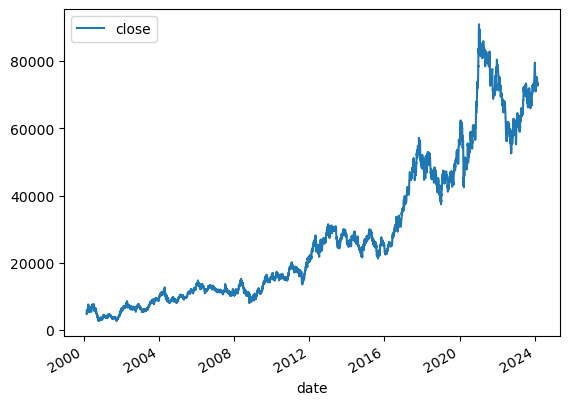

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('Samsung.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,6015.000000,6015.000000,6015.000000,6015.000000,6.015000e+03
mean,27918.518703,28188.636741,27638.650042,27910.063175,2.099048e+07
std,22054.910596,22225.709692,21868.814930,22035.534613,1.487403e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,0.000000e+00
25%,10770.000000,10940.000000,10630.000000,10780.000000,1.161698e+07
50%,20320.000000,20580.000000,20140.000000,20240.000000,1.701615e+07
75%,44925.000000,45500.000000,44535.000000,44950.000000,2.598315e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,1.642150e+08


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data.head() 

,open,high,low,close,volume,Tomorrow
date,,,,,,
2000-02-28,5000.0,5050.0,4800.0,4800.0,30140000,5120.0
2000-02-29,4900.0,5140.0,4840.0,5120.0,51820000,5120.0
2000-03-01,5120.0,5120.0,5120.0,5120.0,0,5880.0
2000-03-02,5880.0,5880.0,5520.0,5880.0,117750000,6000.0
2000-03-03,6200.0,6250.0,5880.0,6000.0,140990000,5640.0


In [13]:
data['previousday']=data['close'].shift(1)

In [14]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
2000-02-28,5000.0,5050.0,4800.0,4800.0,30140000,5120.0,NaN
2000-02-29,4900.0,5140.0,4840.0,5120.0,51820000,5120.0,4800.0
2000-03-01,5120.0,5120.0,5120.0,5120.0,0,5880.0,5120.0
2000-03-02,5880.0,5880.0,5520.0,5880.0,117750000,6000.0,5120.0
2000-03-03,6200.0,6250.0,5880.0,6000.0,140990000,5640.0,5880.0


In [15]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]

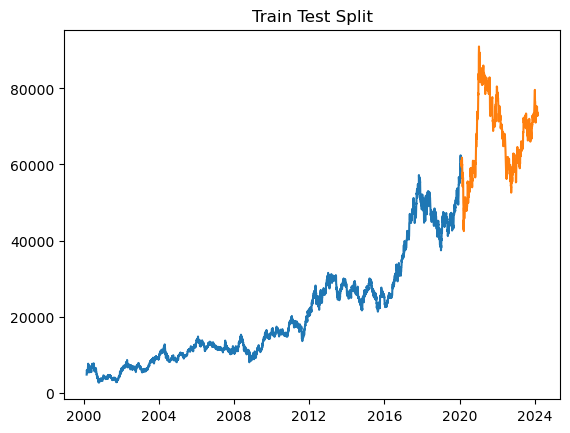

In [16]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [17]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [18]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [19]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 7402.45
MAPE: 0.10
minae: 0.80
maxae: 29023.00
medae: 5898.00

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 7318.18
MAPE: 0.10
minae: 0.13
maxae: 28714.16
medae: 5702.89

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 7360.58
MAPE: 0.10
minae: 2.74
maxae: 29005.34
medae: 5785.61

Learning rate set to 0.343417
0:	learn: 9312.4380762	total: 148ms	remaining: 14.7s
1:	learn: 6360.3014043	total: 152ms	remaining: 7.42s
2:	learn: 4316.1880835	total: 156ms	remaining: 5.03s
3:	learn: 2989.2884197	total: 161ms	remaining: 3.85s
4:	learn: 2090.5637499	total: 171ms	remaining: 3.24s
5:	learn: 1503.8800291	total: 175ms	remaining: 2.74s
6:	learn: 1144.8579585	total: 181ms	remaining: 2.4s
7:	learn: 924.0685082	total: 186ms	remaining: 2.14s
8:	learn: 803.5172242	total: 199ms	remaining: 2.01s
9:	learn: 737.8849879	total: 202ms	remai

#### Retrain the best Model(Extreme Gradient Boosting)

In [20]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [21]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [22]:
#combined_1.plot();
combined_2

,close,0
date,,
2020-02-05,59500.0,59298.238128
2020-02-06,61100.0,60333.277511
2020-02-07,60400.0,60462.576880
2020-02-10,59700.0,60005.509135
2020-02-11,59900.0,60348.258463
...,...,...
2024-02-19,73800.0,62207.473190
2024-02-20,73300.0,62184.014848
2024-02-21,73000.0,62207.473190


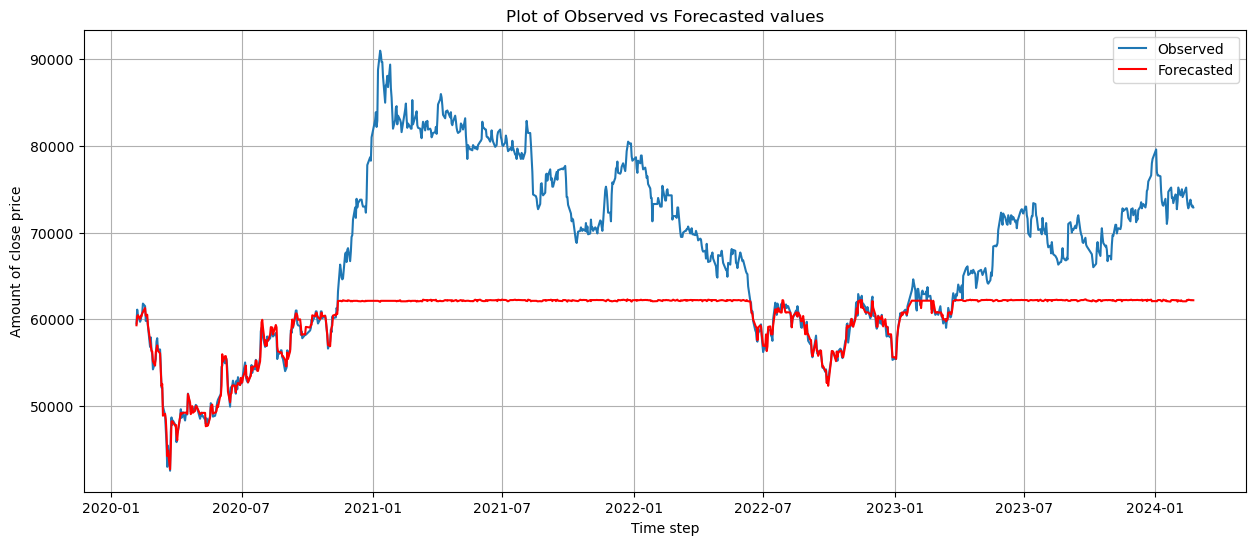

In [23]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [24]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [25]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [26]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [27]:
data['RSI']= computeRSI(data['close'], 14)

In [28]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
2000-02-28,5000.0,5050.0,4800.0,4800.0,30140000,5120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,4900.0,5140.0,4840.0,5120.0,51820000,5120.0,4800.0,1.032258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,5120.0,5120.0,5120.0,5120.0,0,5880.0,5120.0,1.000000,9920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-02,5880.0,5880.0,5520.0,5880.0,117750000,6000.0,5120.0,1.069091,10240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-03,6200.0,6250.0,5880.0,6000.0,140990000,5640.0,5880.0,1.010101,11000.0,1.114413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.shape 

(6015, 19)

In [30]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
2000-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,NaN
2000-02-29,1.032258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5120.0,NaN
2000-03-01,1.000000,9920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5120.0,NaN
2000-03-02,1.069091,10240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5880.0,NaN
2000-03-03,1.010101,11000.0,1.114413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,NaN


In [31]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [32]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [33]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [34]:
new_data=new_data.dropna()
new_data.shape 

(5015, 16)

In [35]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
2003-12-29,0.998298,17610.0,0.999319,44070.0,0.966325,546020.0,1.175647,1869200.0,1.483252,5928910.0,8800.0,-0.027624,8803.333333,8797.5,5931.778222,9005.598023
2003-12-30,1.012346,17630.0,1.020131,44030.0,0.989578,546400.0,1.203463,1871310.0,1.519334,5932910.0,9020.0,-0.008791,8883.333333,8857.5,5934.860279,9006.300559
2003-12-31,1.000000,17820.0,1.014623,44210.0,0.988601,546900.0,1.201833,1873760.0,1.518337,5936810.0,9020.0,-0.021692,8946.666667,8917.5,5937.936191,9006.968824
2004-01-01,1.000000,18040.0,1.009174,44450.0,0.987790,547440.0,1.200285,1876300.0,1.517535,5940710.0,9020.0,-0.006608,9020.000000,8965.0,5941.005976,9007.604491
2004-01-02,0.997778,18040.0,1.001338,44690.0,0.983266,547890.0,1.193330,1878720.0,1.510048,5943850.0,8980.0,0.014689,9006.666667,9010.0,5944.029851,9006.257931


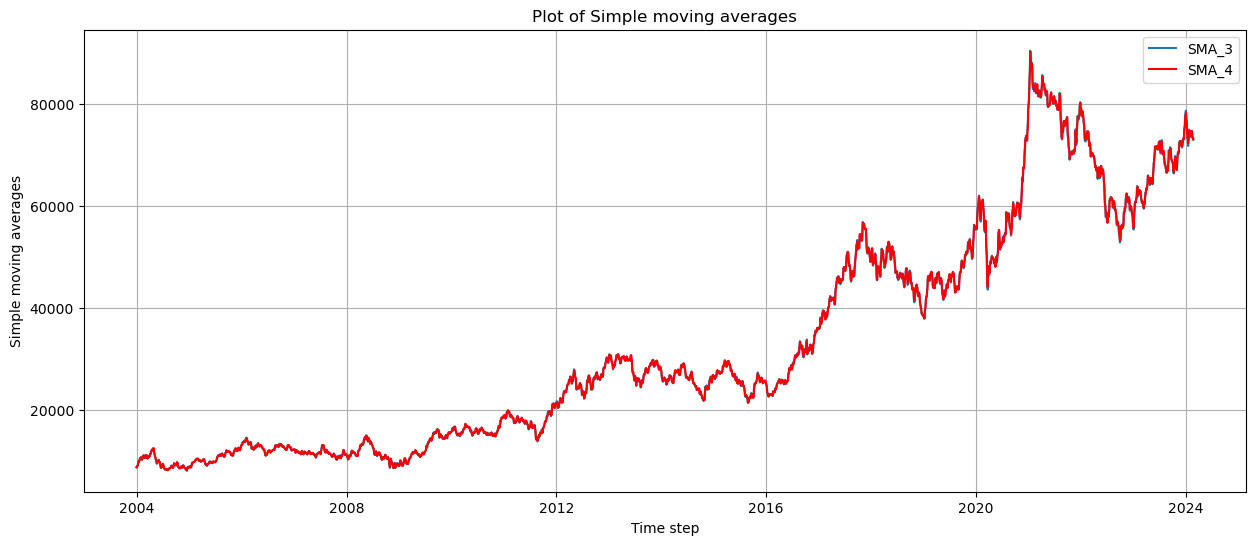

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

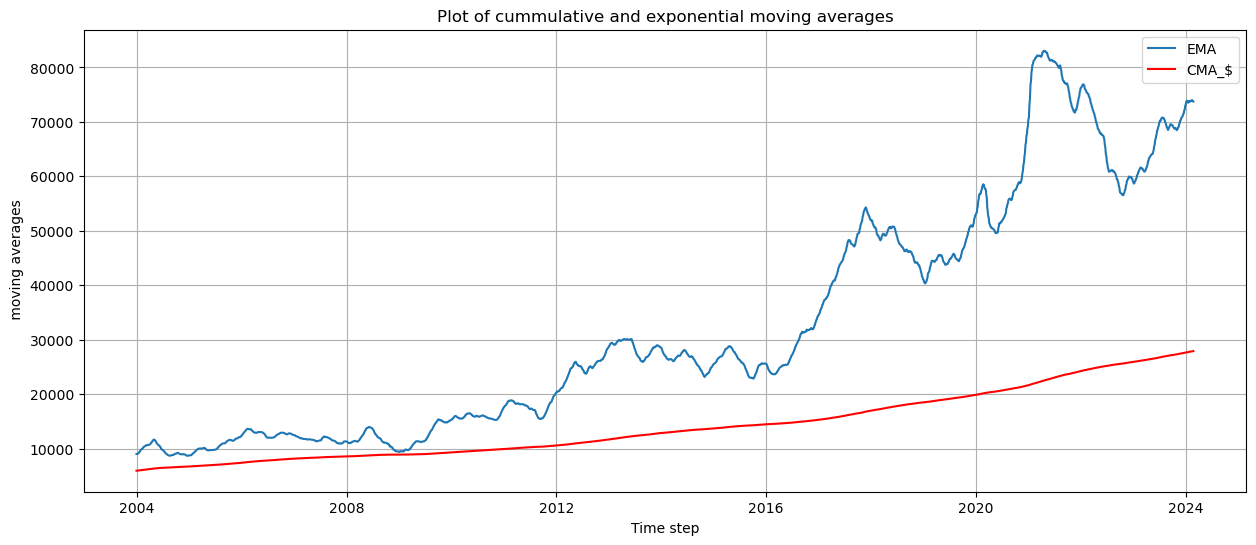

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

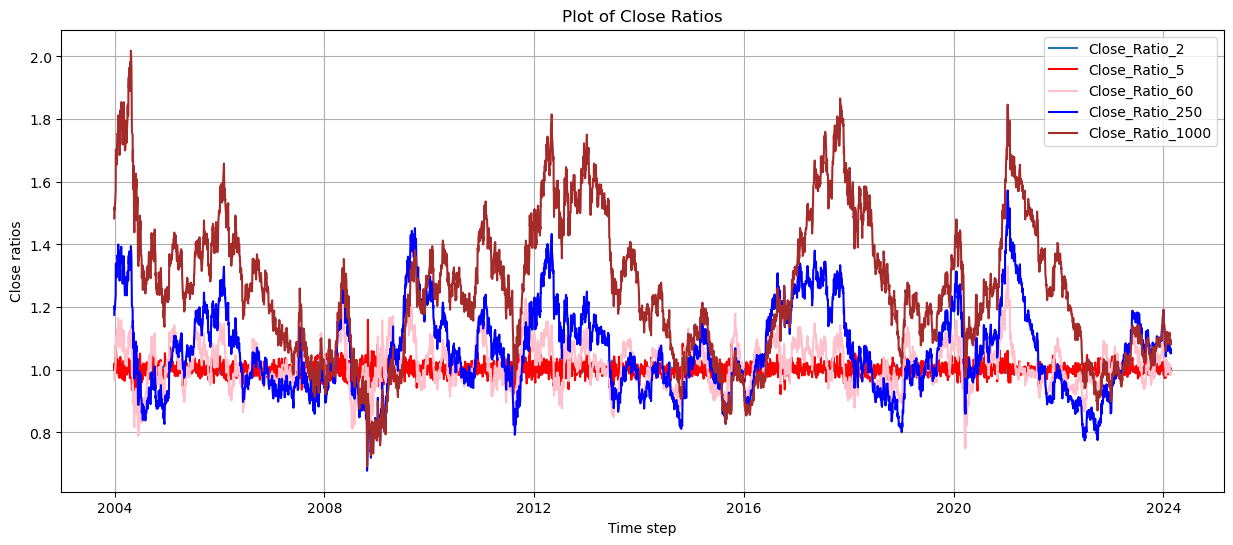

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

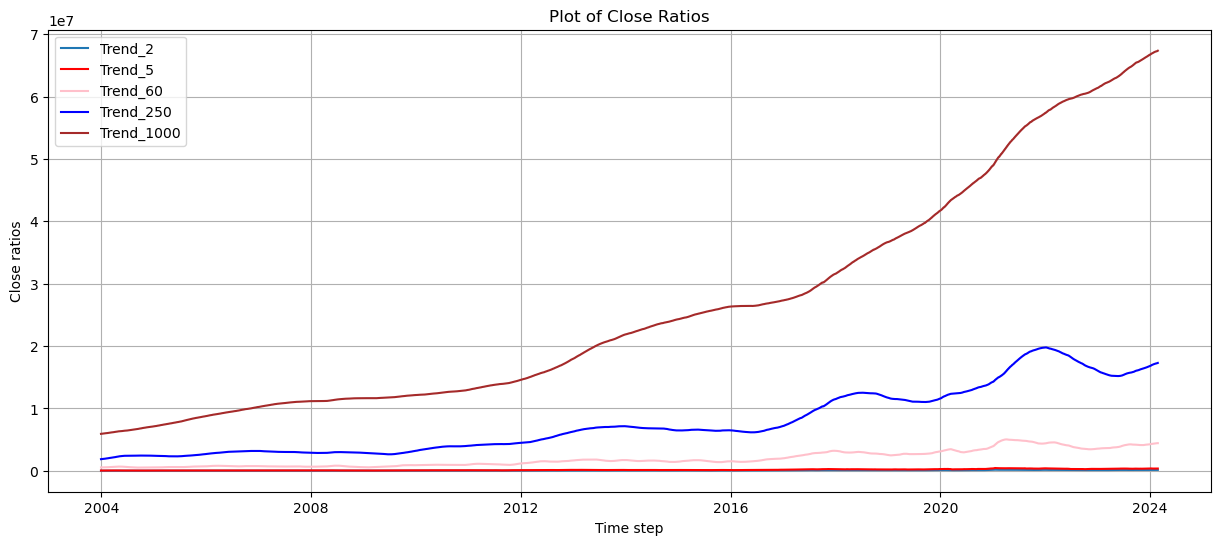

In [39]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [40]:
new_data['RSI']=data['RSI']

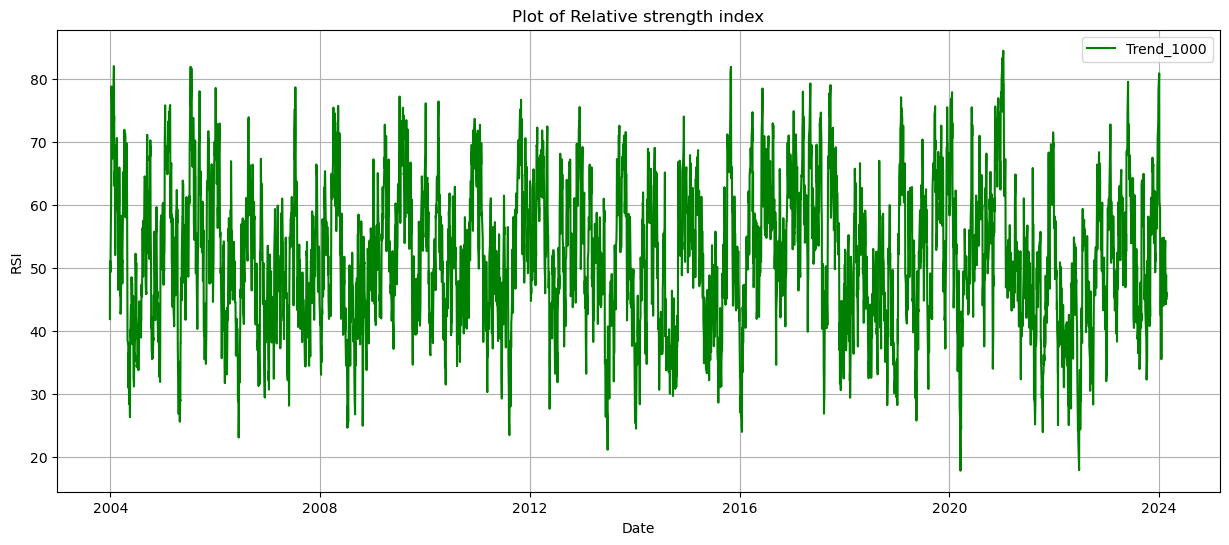

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

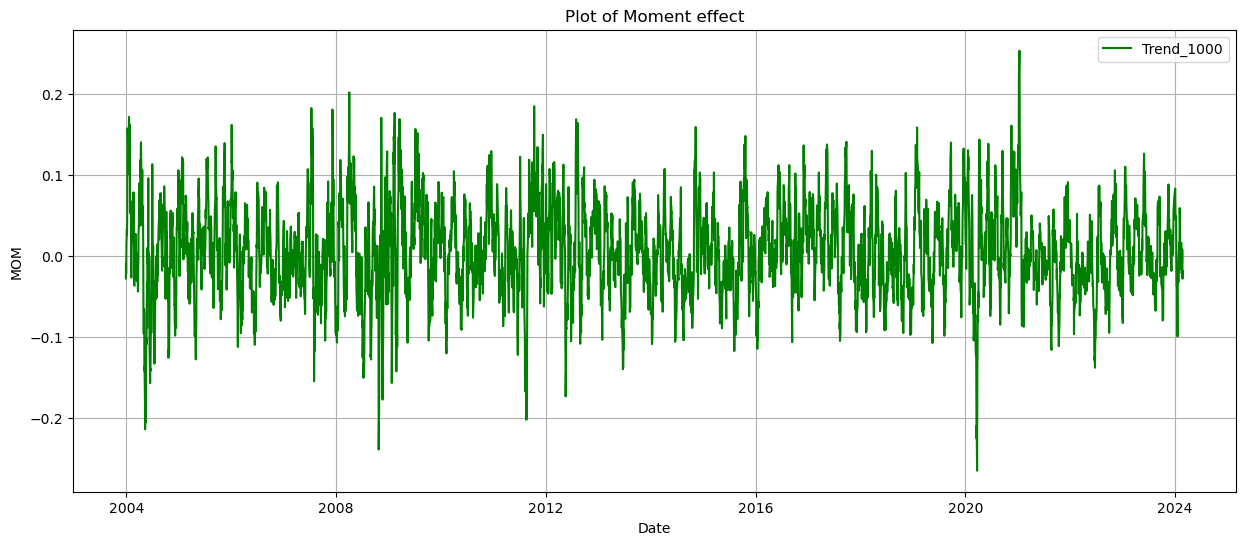

In [42]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [43]:
new_data['previousday']=data['previousday']

In [44]:
train = new_data.iloc[:-1000]
test = new_data.iloc[-1000:]

In [45]:
train.shape

(4015, 18)

In [46]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [47]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM','previousday'] 

#### Retrain the models on the new predictors

In [48]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 9060.66
MAPE: 0.12
minae: 2.80
maxae: 29046.00
medae: 8398.50

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 9693.47
MAPE: 0.13
minae: 1.23
maxae: 29663.53
medae: 9584.29

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 8439.92
MAPE: 0.11
minae: 0.68
maxae: 28768.36
medae: 7646.63

Learning rate set to 0.33156
0:	learn: 9056.7331946	total: 4.29ms	remaining: 425ms
1:	learn: 6273.3206484	total: 8.37ms	remaining: 410ms
2:	learn: 4382.6634944	total: 12.1ms	remaining: 392ms
3:	learn: 3105.6856427	total: 15.5ms	remaining: 372ms
4:	learn: 2220.8084029	total: 19.1ms	remaining: 363ms
5:	learn: 1639.4746225	total: 22.6ms	remaining: 355ms
6:	learn: 1252.2549358	total: 26.5ms	remaining: 352ms
7:	learn: 1007.8244094	total: 29.9ms	remaining: 344ms
8:	learn: 867.2882209	total: 33.5ms	remaining: 338ms
9:	learn: 778.6556699	total: 37.3ms	remaining: 336ms
10:	learn: 711.1588

#### Improving the model

In [49]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [50]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [51]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [52]:
predictions_2 = backtest(new_data, model_2, predictors)

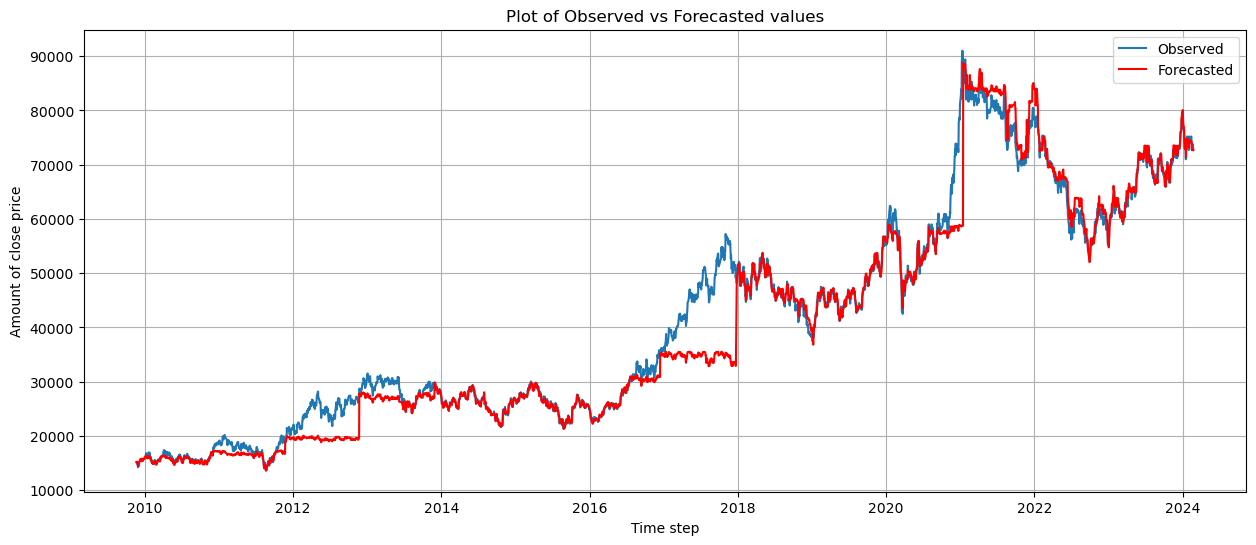

In [53]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [54]:
model_2.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [55]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [56]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.1387341000401911

mean absolute  error is : 10307.32659909911



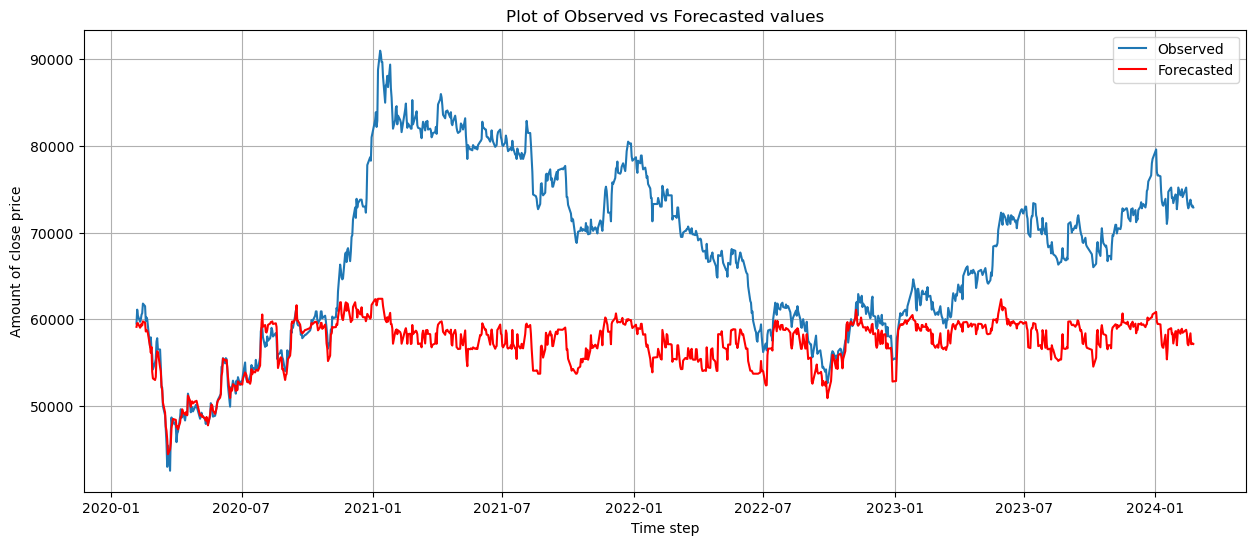

In [57]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [58]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [59]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [60]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 8348.379839346251 
 gradientboost minae: 1.156967853254173 
 gradientboost maxae: 28675.630411126323 
 gradientboost medae: 7482.428257052477 
 gradientboost Mape: 0.11071265332549285 
  

 <-------------------------------------------------->



In [61]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2020-02-05,59500.0,58911.960031
2020-02-06,61100.0,60295.668986
2020-02-07,60400.0,60759.705411
2020-02-10,59700.0,60248.347606
2020-02-11,59900.0,60356.209865
...,...,...
2024-02-19,73800.0,60709.509585
2024-02-20,73300.0,60590.764115
2024-02-21,73000.0,60505.429254


In [62]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [63]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.11071265332549285

mean absolute  error is : 8348.379839346251



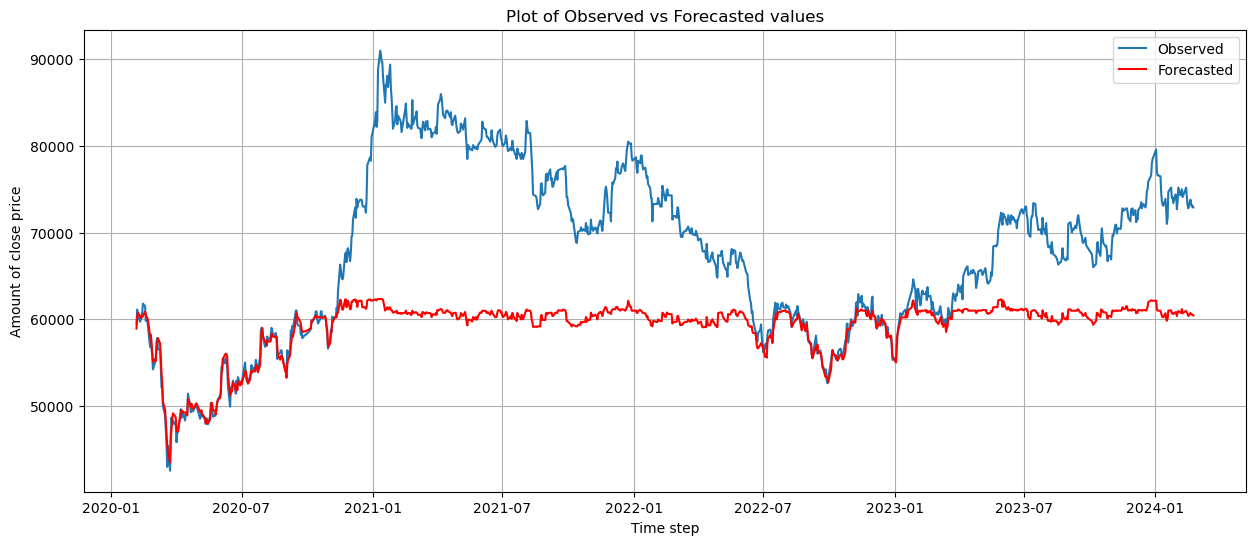

In [64]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [65]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 9456.663 
 bagging minae: 2.0 
 bagging maxae: 29150.0 
 bagging medae: 8965.0 
 bagging Mape: 0.1264185056948116 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 446.7864676699835 
 stacking minae: 0.07429245281673502 
 stacking maxae: 3534.5921144204767 
 stacking medae: 348.5561411748713 
 stacking mape: 0.006787954568023252 



In [66]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [67]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [68]:
combined_bagg.head()

,close,0
date,,
2020-02-05,59500.0,57960.0
2020-02-06,61100.0,58830.0
2020-02-07,60400.0,58700.0
2020-02-10,59700.0,58410.0
2020-02-11,59900.0,58480.0


In [69]:
combined_stack

,close,0
date,,
2020-02-05,59500.0,59021.762011
2020-02-06,61100.0,60885.749683
2020-02-07,60400.0,60235.456795
2020-02-10,59700.0,60573.895984
2020-02-11,59900.0,59769.204660
...,...,...
2024-02-19,73800.0,73451.639314
2024-02-20,73300.0,73097.978157
2024-02-21,73000.0,73666.805555


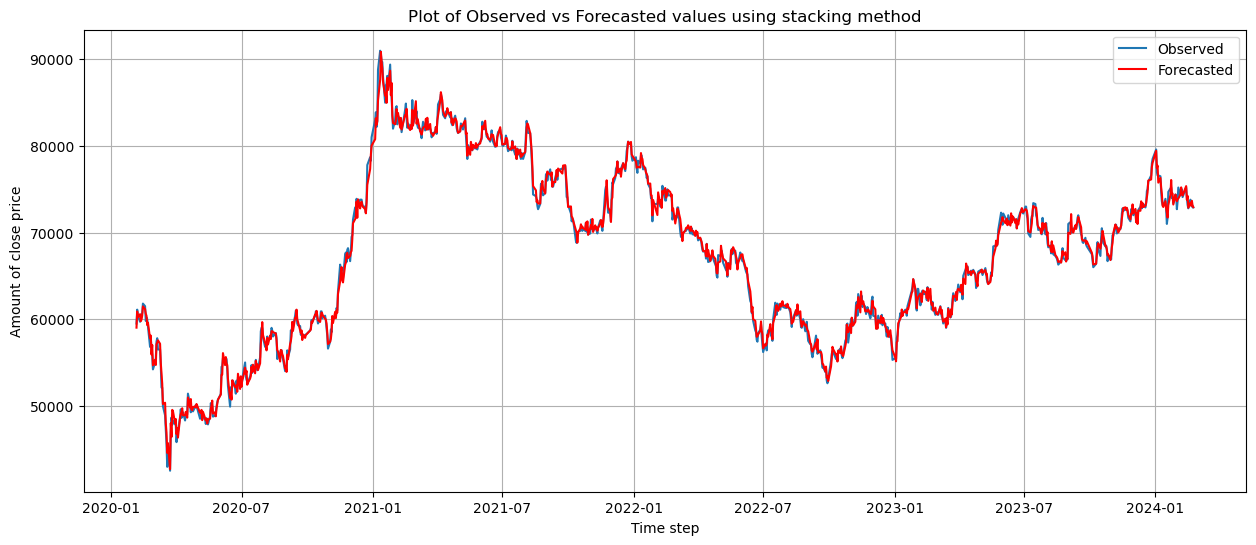

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

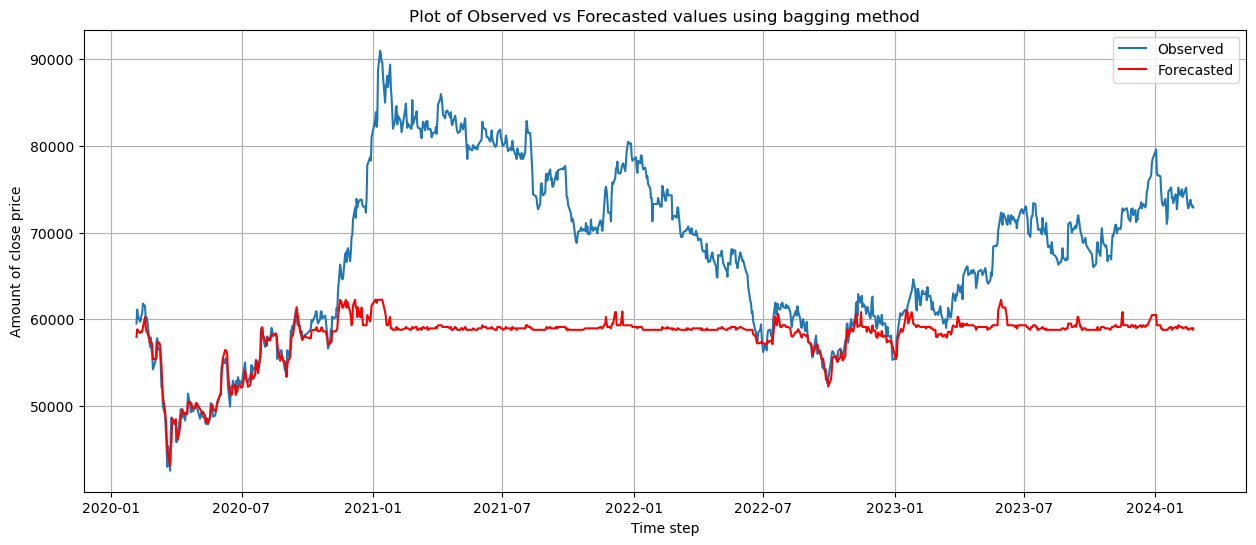

In [71]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

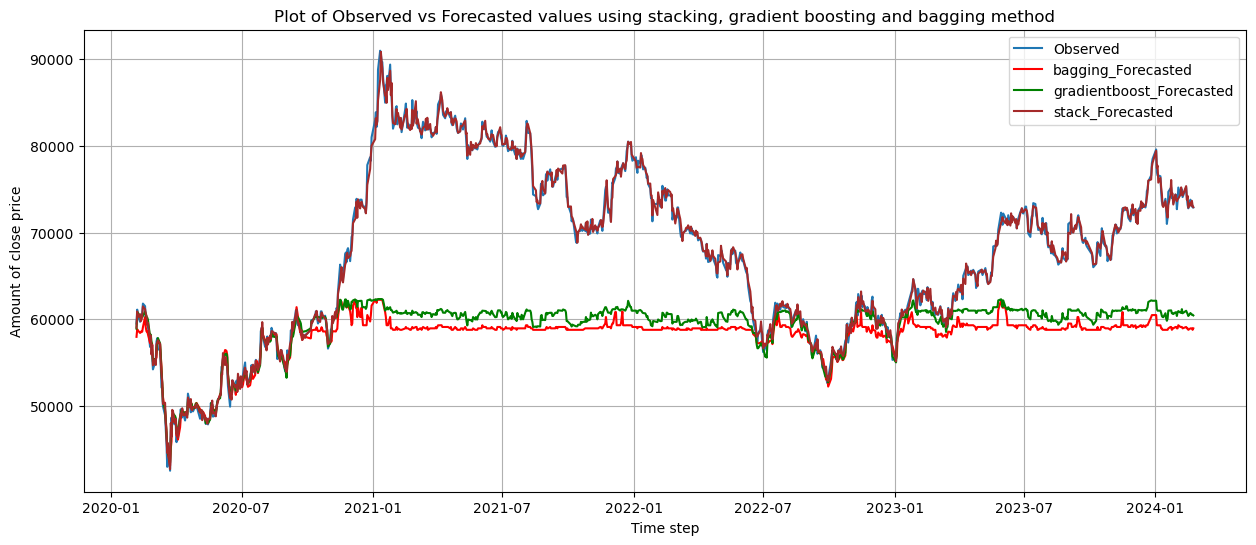

In [72]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('Samsungresult.png')
plt.show()

In [73]:
from prettytable import PrettyTable
import joblib
import os

In [74]:
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 9060.66, 0.12, 2.80, 29046.00, 839.50])
task1_result.add_row(['XGboost', 9693.47, 0.13, 1.23, 29663.53, 9584.29])
task1_result.add_row(['GradientBoost', 8439.92, 0.11, 0.68, 28768.36, 7646.3])
task1_result.add_row(['Catboost', 10307.33, 0.14, 9.84, 28671.58, 10625.36])
task1_result.add_row(['Bagging', 9456.663, 0.1264, 2.0, 29150.0, 8965.0])
task1_result.add_row(['Stacking', 446.90, 0.0068, 0.04, 3522.57, 355.902])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |   9060.66   |     0.12     |      2.8      |    29046.0    |     839.5     |
|    XGboost    |   9693.47   |     0.13     |      1.23     |    29663.53   |    9584.29    |
| GradientBoost |   8439.92   |     0.11     |      0.68     |    28768.36   |     7646.3    |
|    Catboost   |   10307.33  |     0.14     |      9.84     |    28671.58   |    10625.36   |
|    Bagging    |   9456.663  |    0.1264    |      2.0      |    29150.0    |     8965.0    |
|    Stacking   |    446.9    |    0.0068    |      0.04     |    3522.57    |    355.902    |
+---------------+-------------+--------------+---------------+---------------+---------------+
